# Lesson 7: xarray 

`xarray` é essencialmente um `pandas` para dados multidimensionais. Ou, nas palavras de um amigo meu, xarray é "pandas meets netCDF".

Se eu fosse indicar uma módulo python fundamental para pesquisa em oceanografia física e ciências climáticas, esse módulo é o xarray. 

In [40]:
import xarray as xr
import numpy as np

import matplotlib.colors as colors
import cmocean as cmo
import matplotlib.pyplot as plt

In [2]:
xr.DataArray?

Init signature:
xr.DataArray(
    data: 'Any' = <NA>,
    coords: 'Sequence[tuple] | Mapping[Any, Any] | None' = None,
    dims: 'Hashable | Sequence[Hashable] | None' = None,
    name: 'Hashable' = None,
    attrs: 'Mapping' = None,
    indexes: 'dict[Hashable, pd.Index]' = None,
    fastpath: 'bool' = False,
)
Docstring:     
N-dimensional array with labeled coordinates and dimensions.

DataArray provides a wrapper around numpy ndarrays that uses
labeled dimensions and coordinates to support metadata aware
operations. The API is similar to that for the pandas Series or
DataFrame, but DataArray objects can have any number of dimensions,
and their contents have fixed data types.

Additional features over raw numpy arrays:

- Apply operations over dimensions by name: ``x.sum('time')``.
- Select or assign values by integer location (like numpy):
  ``x[:10]`` or by label (like pandas): ``x.loc['2014-01-01']`` or
  ``x.sel(time='2014-01-01')``.
- Mathematical operations (e.g., ``x - y``) v

## Tipo de dado (data type) mais básico em xarray: DataArray

In [3]:
variable = np.array([1,2,3])
time = [0.1,0.2,0.3]

In [4]:
da = xr.DataArray(data=variable, dims={'time': time},attrs={'units': 'units of var'})

In [5]:
da.attrs['description'] = 'this is my first data array'

In [6]:
da

<xarray.DataArray (time: 3)>
array([1, 2, 3])
Dimensions without coordinates: time
Attributes:
    units:        units of var
    description:  this is my first data array

In [7]:
da2 = da + 10

In [8]:
da.values

array([1, 2, 3])

In [9]:
da.attrs

{'units': 'units of var', 'description': 'this is my first data array'}

In [10]:
type(da)

xarray.core.dataarray.DataArray

## O tipo de dado mais importante em xarray: Dataset 

In [11]:
xr.Dataset?

Init signature:
xr.Dataset(
    data_vars: 'Mapping[Any, Any]' = None,
    coords: 'Mapping[Any, Any]' = None,
    attrs: 'Mapping[Any, Any]' = None,
)
Docstring:     
A multi-dimensional, in memory, array database.

A dataset resembles an in-memory representation of a NetCDF file,
and consists of variables, coordinates and attributes which
together form a self describing dataset.

Dataset implements the mapping interface with keys given by variable
names and values given by DataArray objects for each variable name.

One dimensional variables with name equal to their dimension are
index coordinates used for label based indexing.

To load data from a file or file-like object, use the `open_dataset`
function.

Parameters
----------
data_vars : dict-like, optional
    A mapping from variable names to :py:class:`~xarray.DataArray`
    objects, :py:class:`~xarray.Variable` objects or to tuples of
    the form ``(dims, data[, attrs])`` which can be used as
    arguments to create a new ``Var

In [12]:
temperature = 20*np.random.rand(10)

In [13]:
temperature

array([15.06543409,  5.34939613, 11.89075488,  4.17850496,  4.22431496,
       12.08013507,  2.92679868, 10.87915996, 12.97666585,  9.82005129])

In [14]:
precipitation = 30*np.random.rand(10)

In [15]:
precipitation

array([ 7.07243147, 27.70497354, 29.58226077,  3.42624914,  7.59633127,
       19.47177334,  0.14071236,  3.60956474, 25.19031777,  0.49474448])

In [16]:
coordinates = {
    'time': np.arange(10),
}

variables = {
    'temp': ('time',temperature),
    'precip': ('time',precipitation),
}

In [17]:
ds = xr.Dataset(variables,coords=coordinates)

In [18]:
ds

<xarray.Dataset>
Dimensions:  (time: 10)
Coordinates:
  * time     (time) int64 0 1 2 3 4 5 6 7 8 9
Data variables:
    temp     (time) float64 15.07 5.349 11.89 4.179 ... 2.927 10.88 12.98 9.82
    precip   (time) float64 7.072 27.7 29.58 3.426 ... 0.1407 3.61 25.19 0.4947

In [19]:
type(ds)

xarray.core.dataset.Dataset

In [20]:
ds['temp']

<xarray.DataArray 'temp' (time: 10)>
array([15.06543409,  5.34939613, 11.89075488,  4.17850496,  4.22431496,
       12.08013507,  2.92679868, 10.87915996, 12.97666585,  9.82005129])
Coordinates:
  * time     (time) int64 0 1 2 3 4 5 6 7 8 9

### Higher-dimension datasets

In [21]:
N = 100
M = 1000

temp = 20*np.random.rand(M,N,N)
precip = 30*np.random.rand(M,N,N)

In [22]:
temp.shape, precip.shape

((1000, 100, 100), (1000, 100, 100))

In [23]:
longitude = np.linspace(0,180,N)
latitude = np.linspace(0,90,N)
time = np.arange(M)

In [24]:
longitude.shape, latitude.shape

((100,), (100,))

In [25]:
coordinates = {
    'time': time,
    'longitude': longitude,
    'latitude': latitude,
}

variables = {
    'temperature': (('time','longitude','latitude'),temp),
    'precipitation': (('time','longitude','latitude'),precip),
}

In [26]:
da = xr.Dataset(variables,coords=coordinates)

In [27]:
da

<xarray.Dataset>
Dimensions:        (time: 1000, longitude: 100, latitude: 100)
Coordinates:
  * time           (time) int64 0 1 2 3 4 5 6 7 ... 993 994 995 996 997 998 999
  * longitude      (longitude) float64 0.0 1.818 3.636 ... 176.4 178.2 180.0
  * latitude       (latitude) float64 0.0 0.9091 1.818 ... 88.18 89.09 90.0
Data variables:
    temperature    (time, longitude, latitude) float64 17.98 6.327 ... 3.946
    precipitation  (time, longitude, latitude) float64 11.1 4.271 ... 6.121

In [28]:
da.temperature.attrs['units'] = 'degrees Celsius'
da.temperature.attrs['long_name'] = 'Atmospheric temperature at sea level'

In [29]:
da

<xarray.Dataset>
Dimensions:        (time: 1000, longitude: 100, latitude: 100)
Coordinates:
  * time           (time) int64 0 1 2 3 4 5 6 7 ... 993 994 995 996 997 998 999
  * longitude      (longitude) float64 0.0 1.818 3.636 ... 176.4 178.2 180.0
  * latitude       (latitude) float64 0.0 0.9091 1.818 ... 88.18 89.09 90.0
Data variables:
    temperature    (time, longitude, latitude) float64 17.98 6.327 ... 3.946
    precipitation  (time, longitude, latitude) float64 11.1 4.271 ... 6.121

In [30]:
da

<xarray.Dataset>
Dimensions:        (time: 1000, longitude: 100, latitude: 100)
Coordinates:
  * time           (time) int64 0 1 2 3 4 5 6 7 ... 993 994 995 996 997 998 999
  * longitude      (longitude) float64 0.0 1.818 3.636 ... 176.4 178.2 180.0
  * latitude       (latitude) float64 0.0 0.9091 1.818 ... 88.18 89.09 90.0
Data variables:
    temperature    (time, longitude, latitude) float64 17.98 6.327 ... 3.946
    precipitation  (time, longitude, latitude) float64 11.1 4.271 ... 6.121

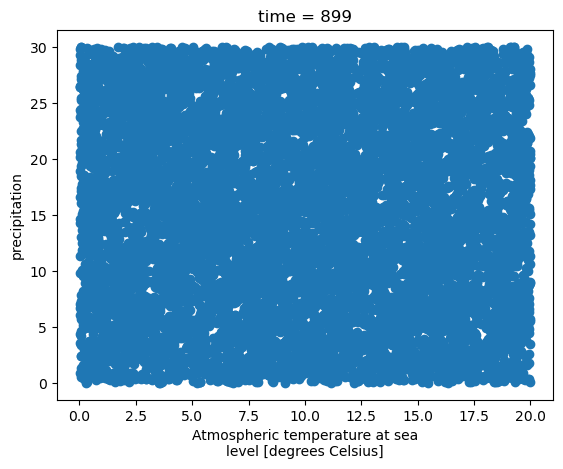

In [31]:
da.sel(time=899).plot.scatter(x='temperature',y='precipitation')

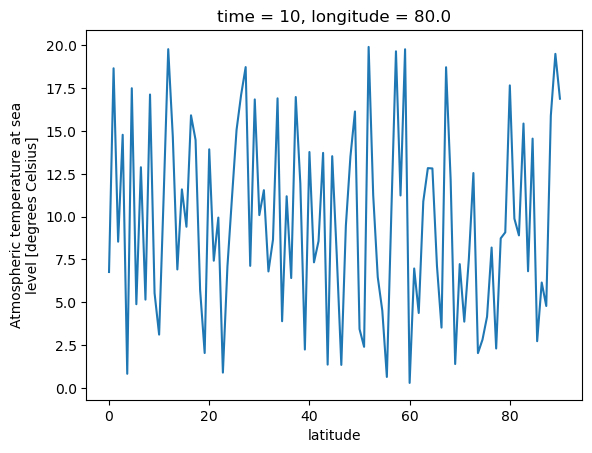

In [32]:
da.sel(longitude=80.,time=10).temperature.plot()

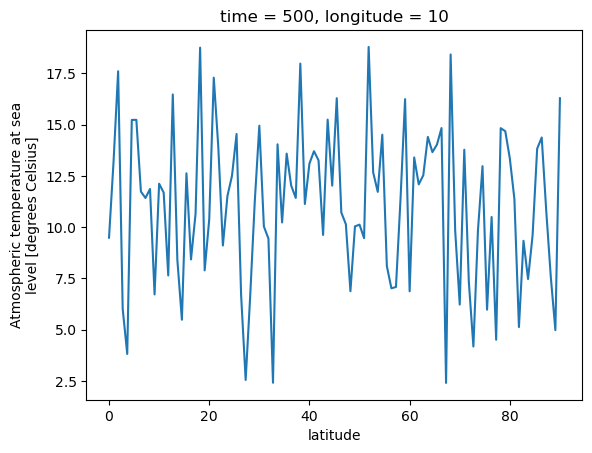

In [33]:
da.interp(longitude=10).sel(time=500).temperature.plot()

In [34]:
da.interp(longitude=np.array([6,10,21,87]))

<xarray.Dataset>
Dimensions:        (time: 1000, longitude: 4, latitude: 100)
Coordinates:
  * time           (time) int64 0 1 2 3 4 5 6 7 ... 993 994 995 996 997 998 999
  * latitude       (latitude) float64 0.0 0.9091 1.818 ... 88.18 89.09 90.0
  * longitude      (longitude) int64 6 10 21 87
Data variables:
    temperature    (time, longitude, latitude) float64 9.679 18.17 ... 15.05
    precipitation  (time, longitude, latitude) float64 17.43 23.16 ... 9.618

# Lendo um aqruivo netCDF disponível online

In [35]:
url = 'http://geoport.whoi.edu/thredds/dodsC/bathy/etopo1_bed_g2'

In [36]:
ds = xr.open_dataset(url)

In [37]:
ds

<xarray.Dataset>
Dimensions:  (lon: 21601, lat: 10801)
Coordinates:
  * lon      (lon) float64 -180.0 -180.0 -180.0 -179.9 ... 180.0 180.0 180.0
  * lat      (lat) float32 -90.0 -89.98 -89.97 -89.95 ... 89.95 89.97 89.98 90.0
Data variables:
    topo     (lat, lon) float32 ...
Attributes:
    Conventions:  COARDS/CF-1.0
    title:        NGDC ETOPO1 Global DEM (1 min)
    history:      grdreformat ETOPO1_Bed_g.int.grd=ni ETOPO1_Bed_g.grd=ns
    GMT_version:  4.3.1b
    node_offset:  0

In [39]:
ds

<xarray.Dataset>
Dimensions:  (lon: 21601, lat: 10801)
Coordinates:
  * lon      (lon) float64 -180.0 -180.0 -180.0 -179.9 ... 180.0 180.0 180.0
  * lat      (lat) float32 -90.0 -89.98 -89.97 -89.95 ... 89.95 89.97 89.98 90.0
Data variables:
    topo     (lat, lon) float32 ...
Attributes:
    Conventions:  COARDS/CF-1.0
    title:        NGDC ETOPO1 Global DEM (1 min)
    history:      grdreformat ETOPO1_Bed_g.int.grd=ni ETOPO1_Bed_g.grd=ns
    GMT_version:  4.3.1b
    node_offset:  0

In [53]:
# recorta os dados para o Atlântico Sudoeste
subset = ds.where(
    (ds.lon>=-60)&
    (ds.lon<=-20)&
    (ds.lat>=-40)&
    (ds.lat<=5),
    drop=True
)

In [54]:
subset

<xarray.Dataset>
Dimensions:  (lat: 2701, lon: 2401)
Coordinates:
  * lon      (lon) float64 -60.0 -59.98 -59.97 -59.95 ... -20.03 -20.02 -20.0
  * lat      (lat) float32 -40.0 -39.98 -39.97 -39.95 ... 4.95 4.967 4.983 5.0
Data variables:
    topo     (lat, lon) float32 -56.0 -57.0 -58.0 ... -4.507e+03 -4.509e+03
Attributes:
    Conventions:  COARDS/CF-1.0
    title:        NGDC ETOPO1 Global DEM (1 min)
    history:      grdreformat ETOPO1_Bed_g.int.grd=ni ETOPO1_Bed_g.grd=ns
    GMT_version:  4.3.1b
    node_offset:  0

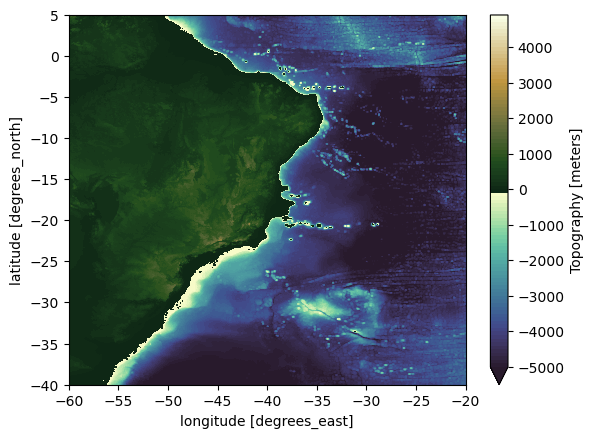

In [56]:
levs = np.arange(-5000,5000,100)

subset.topo.plot.contourf(x='lon',y='lat',levels=levs,cmap=cmo.cm.topo)